In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
from prettytable import PrettyTable


In [42]:
df = pd.read_csv('creditcard_Tarea6.csv', nrows=50000).drop(columns =['id'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.164244,-0.212434,0.926673,-1.469786,0.376403,0.322168,0.597508,-0.059621,0.169117,0.182396,...,-0.048453,0.117045,-0.228659,-1.092469,0.034253,2.637141,-0.422916,-0.146095,3846.45,0
49996,-0.943457,0.176330,-0.492186,-0.181533,-0.277748,-0.006467,0.099527,0.522385,0.144604,0.967535,...,-0.132169,0.331899,0.284364,-0.766199,-0.207690,-0.757928,0.400338,-0.449968,15431.63,0
49997,-0.320219,-0.572996,2.056778,-1.235131,0.145952,0.481686,0.603294,-0.145852,0.971825,0.476542,...,-0.168644,-0.035589,-0.166514,0.189279,-0.110306,1.694308,0.128661,-0.154271,16399.70,0
49998,-0.609149,0.242923,-0.226428,-0.238189,-0.202749,-0.034206,0.252674,0.332522,0.043025,0.795615,...,-0.023413,0.390157,-0.083498,0.113793,-0.773968,-0.950010,0.222696,-0.159129,23175.49,0


Text(0.5, 1.0, 'Balance de Clases')

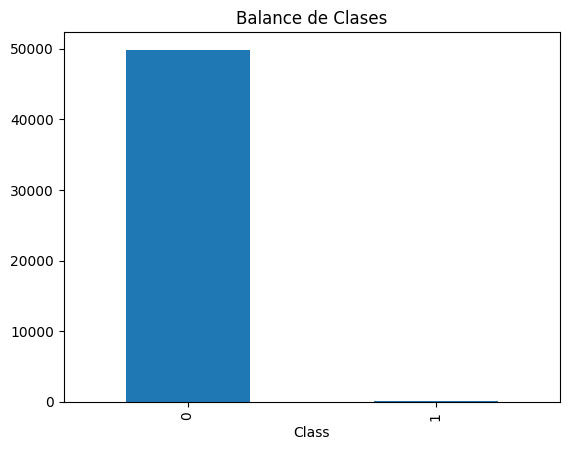

In [43]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Balance de Clases')


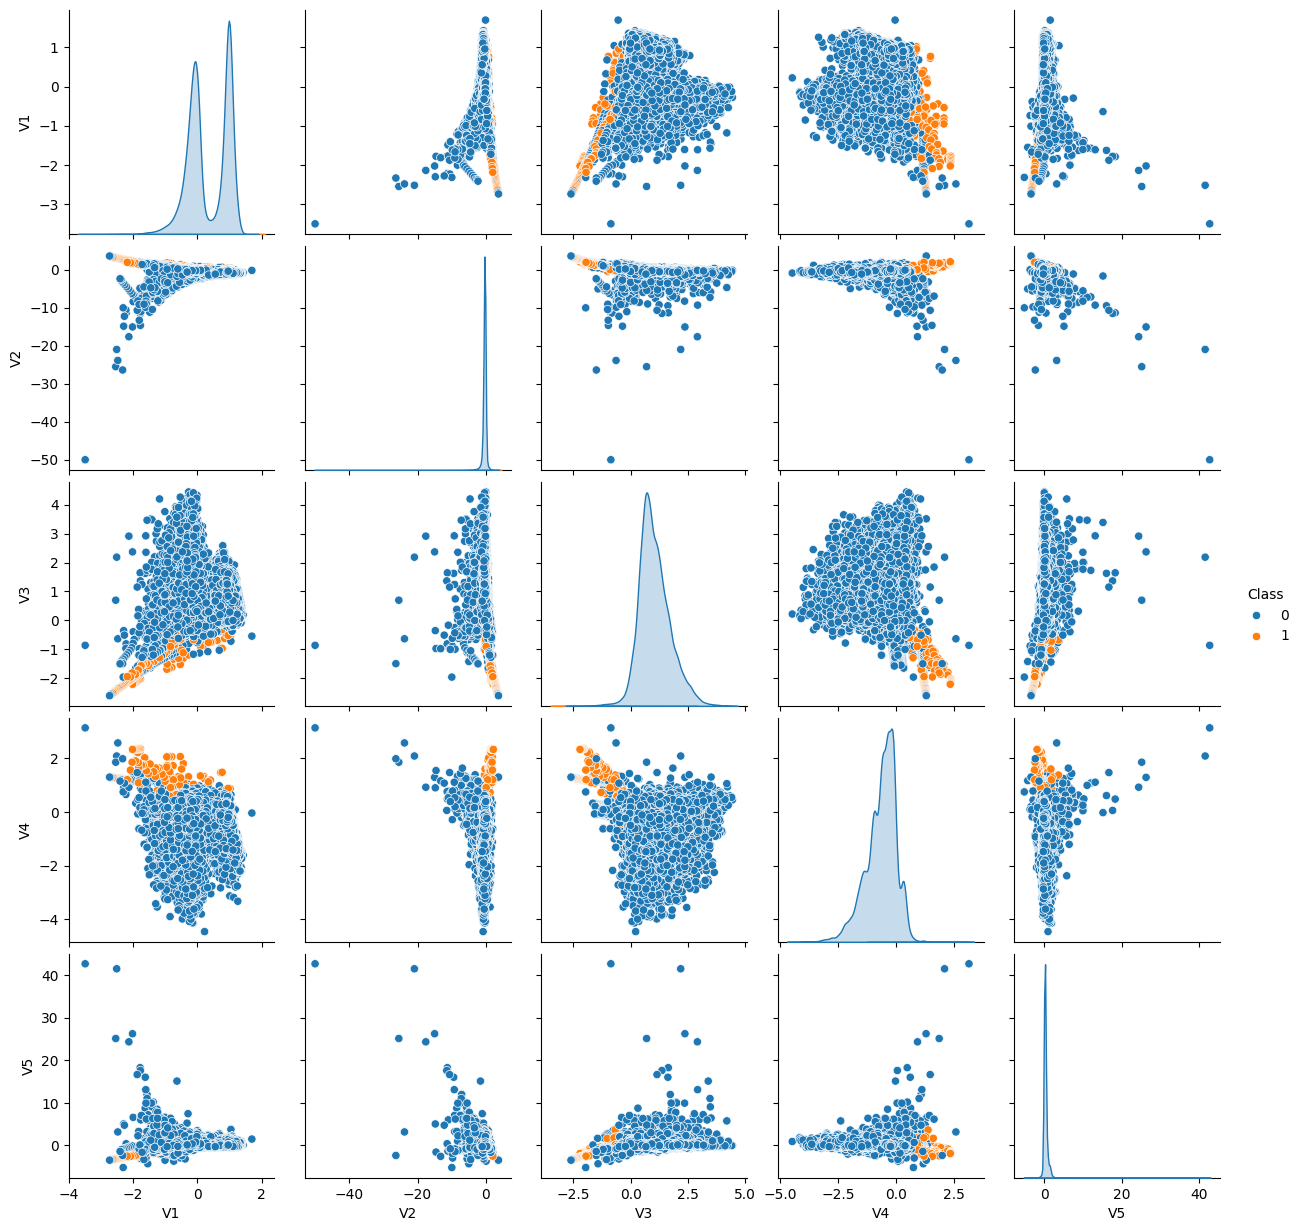

In [44]:
sns.pairplot(df, hue='Class', vars=['V1', 'V2', 'V3', 'V4', 'V5'])

In [54]:
X = df.drop(columns = ['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=254, stratify=y)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.93      0.86      0.89        44

    accuracy                           1.00     15000
   macro avg       0.96      0.93      0.95     15000
weighted avg       1.00      1.00      1.00     15000



In [57]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

opt_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1')
opt_svm.fit(X_train, y_train)

print("Mejores hiperparámetros:", opt_svm.best_params_)

Mejores hiperparámetros: {'C': 0.1, 'kernel': 'poly'}


In [66]:
y_pred_svm_opt = opt_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.93      0.86      0.89        44

    accuracy                           1.00     15000
   macro avg       0.96      0.93      0.95     15000
weighted avg       1.00      1.00      1.00     15000



### Tras la optimización, la precisión aumentó ligeramente (0.95), pero el recall se redujo significativamente (0.86 → 0.80)

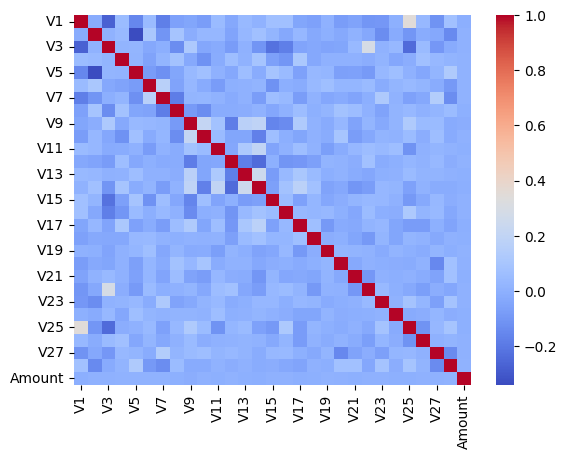

In [59]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
sns.heatmap(X_train_df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [60]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14956
           1       0.15      0.84      0.26        44

    accuracy                           0.99     15000
   macro avg       0.58      0.91      0.63     15000
weighted avg       1.00      0.99      0.99     15000



### Produce un recall alto (0.84), pero una precisión muy baja, ya que la mayoría de las predicciones positivas no corresponden a fraudes reales. Un que el recall es major y este ocupa un menor tiempo de ejecución

In [67]:
table = PrettyTable()
table.field_names = ["Modelo", "f1-score", "recall", "precision"]
table.add_row(["SVC Basico", f1_score(y_test, y_pred_svm), recall_score(y_test, y_pred_svm), precision_score(y_test, y_pred_svm)])
table.add_row(["SVC Optimizado", f1_score(y_test, y_pred_svm_opt), recall_score(y_test, y_pred_svm_opt), precision_score(y_test, y_pred_svm_opt)])
table.add_row(["Naïve Bayes", f1_score(y_test, y_pred_nb), recall_score(y_test, y_pred_nb), precision_score(y_test, y_pred_nb)])
table

Modelo,f1-score,recall,precision
SVC Basico,0.8941176470588236,0.8636363636363636,0.926829268292683
SVC Optimizado,0.8641975308641975,0.7954545454545454,0.9459459459459459
Naïve Bayes,0.2605633802816901,0.8409090909090909,0.15416666666666667


### En base a la metrica recall  se escoge el modelo SVC basico sin optimizar dado que tiene el recall mas alto entre los 3 modelos